<a href="https://colab.research.google.com/github/Robbysaidiii/Submission-mc211d5y2136-/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_RobySaidi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [94]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df=pd.read_csv('/content/drive/MyDrive/hasil_clustering.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [96]:
#Type your code here
# Prepare features and target
X = df.drop(['Potential_Fraud', 'TransactionTime'], axis=1)
y = df['Potential_Fraud']

In [97]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [98]:
# Preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
])

In [99]:
# Apply preprocessing
X_train_res, y_train_res = preprocessor.fit_resample(X_train, y_train)
X_test_scaled = preprocessor.named_steps['scaler'].transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [100]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [101]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean', weights='distance')

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [102]:
# Buat prediksi
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

In [103]:
# Tetapkan prediksi ke rf_test_pred
rf_test_pred = rf_pred

In [104]:
#Type your code here
# Hitung metrik evaluasi
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred)
rf_recall = recall_score(y_test, rf_test_pred)

In [105]:
print("Hasil Prediksi Random Forest:")
print(f"- Accuracy: {rf_accuracy:.4f}")
print(f"- F1-Score: {rf_f1:.4f}")
print(f"- Precision: {rf_precision:.4f}")
print(f"- Recall: {rf_recall:.4f}")
print(f"- ROC AUC: {roc_auc_score(y_test, rf_prob):.4f}")

Hasil Prediksi Random Forest:
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC: 1.0000


Model Random Forest mencapai akurasi 100%, dengan F1-Score, Precision, Recall, dan ROC AUC juga sempurna (1.0000). Ini menunjukkan klasifikasi tanpa kesalahan.atau model mengalami overfitting (terlalu menghafal data latih).

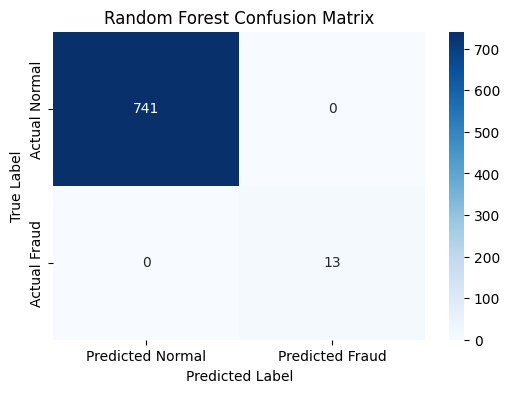

In [106]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest Confusion Matrix:

True Positives: 13 (Semua fraud terdeteksi dengan benar)

False Positives: 0 (Tidak ada normal yang salah diklasifikasikan sebagai fraud)

False Negatives: 0 (Tidak ada fraud yang salah diklasifikasikan sebagai normal)

True Negatives: 741 (Semua normal terdeteksi dengan benar)

Kelebihan: Random Forest memberikan hasil sempurna dalam mendeteksi fraud dan normal dengan akurasi 100%.

In [107]:
# Prediksi pada data uji
knn_test_pred = knn_model.predict(X_test_scaled)
knn_test_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

In [108]:
# Hitung metrik evaluasi
knn_accuracy = accuracy_score(y_test, knn_test_pred)
knn_f1 = f1_score(y_test, knn_test_pred)
knn_precision = precision_score(y_test, knn_test_pred)
knn_recall = recall_score(y_test, knn_test_pred)

In [109]:
print("Hasil Prediksi KNN:")
print(f"- Accuracy: {knn_accuracy:.4f}")
print(f"- F1-Score: {knn_f1:.4f}")
print(f"- Precision: {knn_precision:.4f}")
print(f"- Recall: {knn_recall:.4f}")
print(f"- ROC AUC: {roc_auc_score(y_test, knn_test_prob):.4f}")

Hasil Prediksi KNN:
- Accuracy: 0.9523
- F1-Score: 0.1818
- Precision: 0.1290
- Recall: 0.3077
- ROC AUC: 0.6313


Model K-Nearest Neighbors (KNN) memiliki akurasi 95.23%, tetapi skor F1-Score (0.1818), Precision (0.1290), Recall (0.3077), dan ROC AUC (0.6313) menunjukkan kinerja yang kurang optimal dalam mendeteksi kelas minoritas.

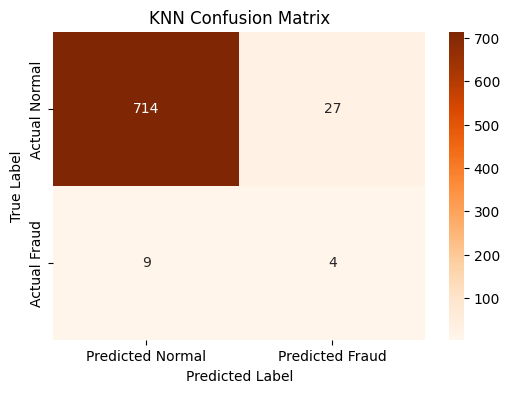

In [110]:
# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

KNN Confusion Matrix:

True Positives (Fraud terdeteksi dengan benar): 4

False Positives (Normal diklasifikasikan sebagai Fraud): 27

False Negatives (Fraud diklasifikasikan sebagai Normal): 9

True Negatives (Normal terdeteksi dengan benar): 714

Kelemahan: KNN memiliki banyak kesalahan dalam mendeteksi fraud (hanya 4 kasus yang benar).

   **kesimpulan**

 Random Forest jauh lebih akurat dan andal dalam mendeteksi kasus fraud dibandingkan dengan KNN.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti overfitting atau underfiting:

*  Random Forest:

Model Random Forest mencapai akurasi 100%, dengan F1-Score, Precision, Recall, dan ROC AUC juga sempurna (1.0000). Ini menunjukkan klasifikasi tanpa kesalahan.

- Overfitting Random Forest

Akurasi 100% bisa jadi indikasi overfitting, terutama jika model terlalu mengikuti pola dari data latih tanpa generalisasi yang baik.


* KNN:

Model K-Nearest Neighbors (KNN) memiliki akurasi 95.23%, tetapi skor F1-Score (0.1818), Precision (0.1290), Recall (0.3077), dan ROC AUC (0.6313) menunjukkan kinerja yang kurang optimal dalam mendeteksi kelas minoritas.

- KNN mengalami kesulitan dalam mendeteksi fraud (Recall hanya 30.77%), yang berarti banyak kasus fraud tidak terdeteksi.


3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Random Forest perlu diuji dengan data baru atau validasi silang untuk memastikan tidak ada bias berlebih.

KNN Bisa mencoba SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan data.
Menyesuaikan jumlah tetangga (n_neighbors) bisa membantu meningkatkan performa.

